# sales analysis using python and data downloaded


### questions that are looked into int this data analysis
#### 1.which month had the best sale
#### 2.which city has the best sale
#### 3.which hour has the best sale
#### 4.which product brings the hightest sale amount
#### 5.which product units are sold the most
#### 6.what products are often sold together
#### 7. relation between the units sold and sales done by each product

### importing libraries

In [1]:
import pandas as pd
import os

##### task 1 is to merging 12 months of data into a single csv file

In [2]:
df= pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files=[file for file in os.listdir('./Sales_Data')]
tot_data= pd.DataFrame()
for file in files:
    df= pd.read_csv("./Sales_Data/"+file)
    tot_data= pd.concat([tot_data,df])
tot_data.to_csv("all_data.csv",index=False)

# read in updated dataframe

In [3]:
data_entred=pd.read_csv("all_data.csv")
data_entred.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### data cleaning for proper using

#### finding NAN data where no values were used

In [4]:
no_data_df= tot_data[tot_data.isna().any(axis=1)]
no_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


#### drop all NAN data in the complete data

In [5]:
tot_data=tot_data.dropna(how='all')
tot_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### finding 'or' and deleting the 'or'

In [6]:
a_df= tot_data[tot_data['Order Date'].str[0:2]=='Or']
a_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### get rid of the duplicated cloumn header that was scattered throughtout the data frame

In [7]:
tot_data=tot_data[tot_data['Order Date'].str[0:2]!='Or']
tot_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Augment data with additional columns

## add month column

In [8]:
tot_data['Month']= tot_data['Order Date'].str[0:2]
tot_data['Month']= tot_data['Month'].astype('int32')
tot_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### convert quantity ordered and each price from string to int value 

##### quantity oreder is int and price should be in float using pd.to_numeric

In [9]:
tot_data['Quantity Ordered']=pd.to_numeric(tot_data['Quantity Ordered']) #make int
tot_data['Price Each']=pd.to_numeric(tot_data['Price Each']) #make it float 
tot_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### adding sales column to multiply the quantity and the price to see the sale of that product

In [10]:
tot_data['sales']=tot_data['Quantity Ordered']*tot_data['Price Each']
tot_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### adding city cloumn from the purchase address column

#### to grab the city address from the data , we need to use .apply() method which allows any function to be performed on the data frame 

#### since the city name is between two comma in the address , we use split method on comma and get city name

In [11]:
def ct_name(address):
    return address.split(',')[1]
tot_data['city name']= tot_data['Purchase Address'].apply(lambda x : ct_name(x))
tot_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


#### we can also get the state address from the data frame

In [12]:
def st_name(address):
    return address.split(',')[2].split(' ')[1]
tot_data['state name']=tot_data['Purchase Address'].apply(lambda x: st_name(x))
tot_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city name,state name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


### finding which month has the best sale 

### getting sales for each month

##### grouping month and summing up the sales

In [13]:
tot_data.groupby('Month').sum()['sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

##### we see that december was the best month had best sale and we also see that jan was the worst month

##### we are now going to display this table in graphical form with the help of matpoltlib.pyplot

In [14]:
import matplotlib.pyplot as plot

###### creating a bar chat for the graph

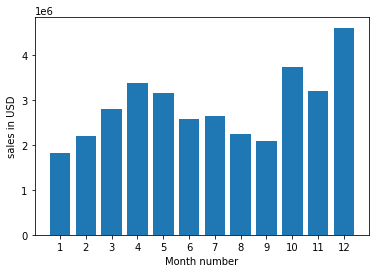

In [15]:
results=tot_data.groupby('Month').sum()
months= range(1,13)
plot.bar(months, results['sales'])
plot.xticks(months)
plot.ylabel('sales in USD')
plot.xlabel('Month number')
plot.show()

##### finding which city has the best sales in the data

In [16]:
results=tot_data.groupby('city name').sum()
results

,Quantity Ordered,Price Each,Month,sales
city name,,,,
Atlanta,16602,2779908.20,104794,2795498.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Portland,14053,2307747.47,87765,2320490.61
San Francisco,50239,8211461.74,315520,8262203.91
Seattle,16553,2733296.01,104941,2747755.48


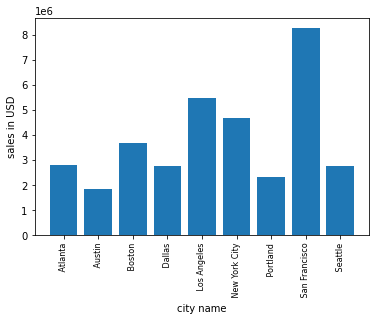

In [17]:
import matplotlib.pyplot as plotc
# we get 9 cities and notice that San Francisco has done the best sales
# now we will plot the sales in a bar graph showing sales in each city
cities= [city for city, df in tot_data.groupby('city name')]
# gives different cities from the data frame and use it in graph
plotc.bar(cities, results['sales'])
plotc.xticks(cities, rotation='vertical',size=8)
plotc.xlabel('city name')
plotc.ylabel('sales in USD')
plotc.show()

##### we can create a hypothesis after looking into the bar chart, since San Francisco is an electronic city we get more sale and since portland is not a electronic city we may not be having good sales in that city 

## now we check the time when there is a best sale of the products

In [18]:
tot_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city name,state name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


#### we have the timings in the Order date after the date , in the form of hour:min, we need to get that string part and group them according to the hours in 24 hours to see the best timing when people purschase the product

In [19]:
# converting the order date in the form of a date and time column
tot_data['Order Date']=pd.to_datetime(tot_data['Order Date'])

In [20]:
tot_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city name,state name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


#### now we are marking the hour for purchase in a new column

In [21]:
tot_data['Hour']=tot_data['Order Date'].dt.hour

tot_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city name,state name,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9


In [22]:
results=tot_data.groupby('Hour').sum()
results

,Quantity Ordered,Price Each,Month,sales
Hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


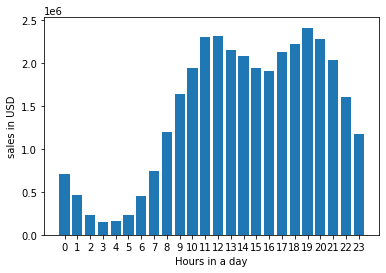

In [23]:
import matplotlib.pyplot as ploth
# we get 24:00 hours 0 to 23:00
# now we will plot the sales in a bar graph showing sales in each hour
hours= [hour for hour, df in tot_data.groupby('Hour')]
# gives different cities from the data frame and use it in graph
ploth.bar(hours, results['sales'])
ploth.xticks(hours)
ploth.xlabel('Hours in a day')
ploth.ylabel('sales in USD')
ploth.show()

#### we see that most of the sales occur at 19:00 hour that is 7 pm 

## which product is sold the most

#### to find types of products that are being sold

In [24]:
results=tot_data.groupby('Product').sum()
results

,Quantity Ordered,Price Each,Month,sales,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


#### to find the most sold product , let us use line graph(we see that iphone has most sales and most products sold  was AAA Batteries (4-pack)

#### product which gives the most sales

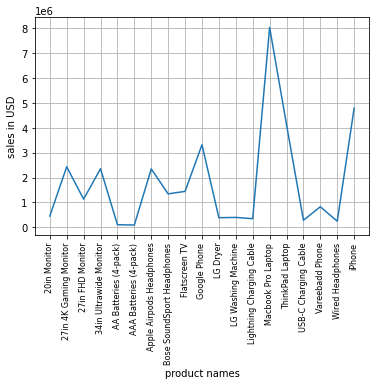

In [25]:
import matplotlib.pyplot as plotp
# we have 19 products in the shop ,we have to plot products in x axis and sales in y axis
products= [product for product, df in tot_data.groupby('Product')]
# gives different products from product list
plotp.plot(products, results['sales'])
plotp.xticks(products, rotation='vertical',size=8)
plotp.xlabel('product names')
plotp.ylabel('sales in USD')
plotp.grid()
plotp.show()


### which product has the most units sold 

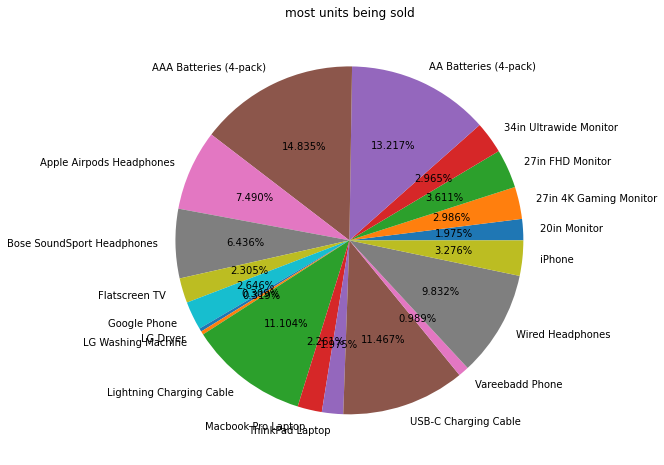

In [26]:
from matplotlib import pyplot as plt
import numpy as np
#Creating dataset
products=[product for product, df in tot_data.groupby('Product')]

 
# Creating plot
fig = plt.figure(figsize =(12, 8))
plt.pie(results['Quantity Ordered'], labels = products, autopct='%.3f%%')
plt.title('most units being sold') 
# show plot
plt.show()

### which products are often bought together during a single purchase

#### here we look into the order ID which will be the same for different products during a single purchase, we group the order id

### grouping order id being same for different products bought at the same time

In [37]:
g_pro = tot_data[tot_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
g_pro['Grouped'] = g_pro.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
product_comb = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\anagha\AppData\Local\Temp\ipykernel_9428\913715012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_pro['Grouped'] = g_pro.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


we use combination for products to find which 3 combinations occur and we use counter from collections module

In [39]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in product_comb['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key,value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


#### we find that google phone , usb-c and wired headdphones are often bought together , and can be placed together to make people by them together , thus increasing sales

### why are some products bought more than the other 
#### we look into the price and the quantity that is bought for each products

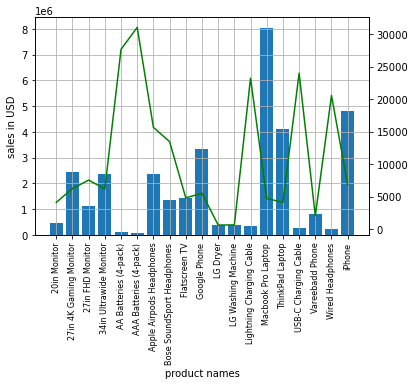

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sales=results['sales']
products= [product for product, df in tot_data.groupby('Product')]
units=results['Quantity Ordered']
plt.bar(products, results['sales'])
plt.xticks(products, rotation='vertical',size=8)
plt.xlabel('product names')
plt.grid()
plt.ylabel('sales in USD')
ax1=plt.twinx()
ax1.plot(products, units,color='green')
plt.show()


##### we see that even though the sales bought by Macbook are high , the most units sold are AAA batteries